 # Pandas


Pandas 데이터 프레임의 장점
- **구조화된 데이터를 효과적으로 처리하고 저장**
- 대용량 데이터를 빠르고 쉽게 다를 수 있다 (한계용량: 엑셀 약 100MB, Pandas DataFrame 1GB~ 100GB)
- 복잡한 기능을 구현하기 쉽다
- 데이터 전처리를 쉽게 할 수 있다
- 다른 시스템(웹 개발, 데이터베이스, 머신러닝 등)과 연동이 쉽다
- Numpy 라이브러리에서 지원하는 수학 및 통계 연산을 그대로 이용할 수 있다. (Numpy를 기반으로 설계했기 때문에!)
- excel, csv 파일을 읽고, 저장할 수 있다.

학습목표
  * *pandas* 라이브러리의 `DataFrame` 및 `Series` 데이터 구조에 학습하기
  * `DataFrame` 및 `Series` 내의 데이터 액세스 및 조작
  *  *pandas* 연산과 함수, 정렬하기
  * *pandas* `DataFrame`으로 csv 등의 데이터 가져오기
  * `DataFrame` 조건으로 검색하기
  * `DataFrame` 함수로 데이터 처리하기
  * `DataFrame` 그룹으로 묶기
  * 멀티인덱스와 피봇테이블

- 판다스 공식 문서 : https://pandas.pydata.org/pandas-docs/stable/index.html#

In [ ]:
# Pandas 불러오기
import pandas as pd
import numpy as np

### 2.1 구조적 데이터 생성하기

 *Pandas*의 기본 데이터 구조는 두 가지 클래스로 구현됩니다.

  * **`DataFrame`**은 행 및 이름이 지정된 열이 포함된 관계형 데이터 테이블입니다. (-> table)
  * **`Series`**는 하나의 열입니다. `DataFrame`에는 하나 이상의 `Series`와 각 `Series`의 이름이 포함됩니다. (-> column)

#### Series를 활용한 데이터 생성

 `Series`를 만드는 한 가지 방법은 `Series` 객체를 만드는 것입니다. 예를 들면 다음과 같습니다.

시리즈는 한 줄. 리스트와 비슷하지만 다른 점이 있음.
데이터 타입 확인 필수
딕셔너리 특성과 ndarray의 특성이 혼합되어 있음

In [ ]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento']) # dtype: object

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

In [ ]:
# Series는 1차원 데이터를 다룬다.
# 세로축 라벨을 index라고 하고, 입력한 시퀀스 데이터를 values라고 한다.
s1 = pd.Series([10, 20, 30, 40, 50])
s1

0    10
1    20
2    30
3    40
4    50
dtype: int64

데이터가 없다는 것을 지칭하는 명칭,

- NaN, nan (난)
- NA, Na
- None
- Null (널)

데이터 접근 시 이 인덱스로 데이터에 접근하게 되므로 중복되면 안 됨. 되도록 유니크, 고유값이어야 함.

In [ ]:
# s = pd.Series([1, 3, 5, 7, 3.1, 1.2]) #float포함되면 모든 요소 다 바뀌어짐
# s = pd.Series([1, 3, 5, 7, 'a', 'b']) #혼용되면 타입 object로 바뀜 단, type(s[1])로 각각 타입 확인하면 int, str로 검색됨
s = pd.Series([70, 87, 50, 60, 95], index = ['김진태', '이원재', '이일신', '안성배', '심우종']) #np.nan 은 데이터가 없다는 뜻/ 시험성적에 대한 데이터 예시
s

김진태    70
이원재    87
이일신    50
안성배    60
심우종    95
dtype: int64

In [ ]:
s2 = pd.Serise({'김진태':70, '이원재':85, '이일신':50}, dtype = np.uint16)
s2

AttributeError: ignored

In [ ]:
type(s[1])

numpy.float64

In [ ]:
s1.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
s1.values

array([10, 20, 30, 40, 50])

In [ ]:
# pandas는 데이터 타입이 섞여도 된다. Numpy는 같은 데이터 타입의 배열만 처리 가능
s2 = pd.Series(['a', 'b', 'c', 1, 2, 3])
s2

0    a
1    b
2    c
3    1
4    2
5    3
dtype: object

In [ ]:
type(s2[2]), type(s2[3])

NameError: ignored

In [ ]:
# np.nan을 이용해서 특정 데이터가 없음을 표시
import numpy as np

s3 = pd.Series([np.nan,10,30])
s3

0     NaN
1    10.0
2    30.0
dtype: float64

In [ ]:
# 인덱스 명 지정하기
index_date = ['2018-10-07','2018-10-08','2018-10-09','2018-10-10']
s4 = pd.Series([200, 195, np.nan, 205], index = index_date)
s4

2018-10-07    200.0
2018-10-08    195.0
2018-10-09      NaN
2018-10-10    205.0
dtype: float64

In [ ]:
# 딕셔너리를 이용하여 데이터와 인덱스를 함께 입력하기
s5 = pd.Series({'국어': 100, '영어': 95, '수학': 90})
s5

국어    100
영어     95
수학     90
dtype: int64

#### DataFrame을 활용한 데이터 생성
- 여러 개의 Series(열)이 모여있는 테이블

배열을 사용해서 데이터 프레임을 만들 수도 있습니다

In [ ]:
# pandas에서 표(Table)와 같은 2차원 데이터 처리를 위해 DataFrame을 제공
# DataFrame을 이용하여 라벨이 있는 2차원 데이터를 생성하고 처리
# df = pd.DataFrame(data, index = index_data, columns = columns_data)

import pandas as pd

pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [ ]:
# 인덱스명과 칼럼명을 지정해주기
import numpy as np
import pandas as pd

data = np.array([[1, 2, 3], [4, 5, 6], [7, 8 ,9], [10, 11, 12]])
index_date = pd.date_range('2019. 9. 1.', periods=4)
index_data = ['2019 . 9. 1.', '2019. 9. 2.']
columns_list = ['A', 'B', 'C']
pd.DataFrame(data, index=index_date, columns=columns_list)

,A,B,C
2019-09-01,1,2,3
2019-09-02,4,5,6
2019-09-03,7,8,9
2019-09-04,10,11,12


In [ ]:
# 리스트로 데이터프레임 만들기
table1 = [
    ['2021-12-06', 1000, 'False', 'gum'],
    ['2021-12-07', 3000, 'True', 'snack'],
    ['2021-12-08', 2000, 'True', 'beverage'],
    ['2021-12-09', 1000, 'True', 'gum']
]
df = pd.DataFrame(table1, columns = ['일자','가격','구매여부','제품'])
df

,일자,가격,구매여부,제품
0,2021-12-06,1000,False,gum
1,2021-12-07,3000,True,snack
2,2021-12-08,2000,True,beverage
3,2021-12-09,1000,True,gum


In [ ]:
# 딕셔너리로 데이터프레임 만들기
table2 = {
    '일자':['2021-12-06','2021-12-07','2021-12-08','2021-12-09'],
    '가격':[1000,3000,2000,1000],
    '구매여부':['False','True','True','True'],
    '제품': ['gum','snack','beverage','gum']
}

df2 = pd.DataFrame(table2)
df2

,일자,가격,구매여부,제품
0,2021-12-06,1000,False,gum
1,2021-12-07,3000,True,snack
2,2021-12-08,2000,True,beverage
3,2021-12-09,1000,True,gum


In [ ]:
df2.columns

Index(['일자', '가격', '구매여부', '제품'], dtype='object')

In [ ]:
df2.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
df2.values #pandas의 value는 넘파이 배열형태로 담겨있다.

array([['2021-12-06', 1000, 'False', 'gum'],
       ['2021-12-07', 3000, 'True', 'snack'],
       ['2021-12-08', 2000, 'True', 'beverage'],
       ['2021-12-09', 1000, 'True', 'gum']], dtype=object)

Quiz. 아래 출력된 것과 같은 형태의 데이터 프레임을 만들어보세요.

In [ ]:
# @title
#    name  age
# 1 A  20
# 2 B 20
# 3 C 23
# 4 D 24

# data = [['A', 20], ['B', 20], ['C', 23], ['D', 24]]

# df_info = pd.DataFrame(data, columns=col, index=index)
# df_info

data = [['A', 20], ['B', 20], ['C', 23], ['D', 24]]
df = pd.DataFrame(data, columns = ['name', 'age'])
df

,name,age
0,A,20
1,B,20
2,C,23
3,D,24


#### 데이터 요약 정보 확인하기
* 데이터프레임의 크기 확인: DataFrame 객체.shape
* 데이터프레임의 기본 정보 출력: DataFrame 객체.info()
* 열 데이터 개수 확인: DataFrame.count()
* 열 데이터의 고유값 개수: DataFrame 객체["열 이름"].value_counts()

In [ ]:
# df의 모양과 크기 확인: (행의 개수, 열의 개수) 튜플로 반환
df.shape #몇 줄로 이루어져 있는지 알 수 있음

(4, 2)

In [ ]:
# 데이터프레임의 기본 정보 출력
df.info()  # .() 메서드 , columns data 중요, non-null: 비어있지 않은 데이터가 4개가 있음
            # memory usage: 192.0+ bytes 메모리 사용량도 알려줌. 파이썬은 알 수 없는데 판다스는 알 수 있어서 유용함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4 non-null      object
 1   age     4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


._____()  괄호 쓰지 않으면 에러 나는 경우 있음
- 괄호 쓰는 경우와 안 써도 되는 경우(암기 필요)
1. 괄호 쓰면 메서드
    - (함수는 실행하면 동작이 실행됨, .info() .count() .value_counts() 호출하는 순간 계산이 실행되며 액션 되므로 괄호 필요)
2. 괄호 안 쓰면 어트리뷰트(어트리뷰트는 변수이므로 클래스 내부에 저장된 변수 불러옴, shape와 columns같은 경우 괄호 없어도 실행됨


In [ ]:
# 각 열의 데이터 개수 확인, pandas의  Series로 데이터 타입 알려줬음(왼쪽이 인덱스값)
df.count()

name    4
age     4
dtype: int64

In [ ]:
# (매우 중요) 각 열의 고유값 개수
df[''].value_counts()

NameError: ignored

### 2.2 데이터 연산

In [ ]:
# pandas의 Series()와 DataFrame()으로 생성한 데이터끼리는 사칙 연산이 가능
s1 = pd.Series([1, 2, 3, 4, 5])
s2 = pd.Series([10, 20, 30, 40, 50])

In [ ]:
s1 + s2

0    11
1    22
2    33
3    44
4    55
dtype: int64

In [ ]:
s2 - s1

0     9
1    18
2    27
3    36
4    45
dtype: int64

In [ ]:
s1 * s2

0     10
1     40
2     90
3    160
4    250
dtype: int64

In [ ]:
s2 / s1

0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
dtype: float64

In [ ]:
import numpy as np


In [ ]:
s1 = np.array([1, 2, 3, 4]) #넘파이 기본은 행렬
s2 = np.array([10, 20, 30, 40, 50])

In [ ]:
s1 * s2   #에러남

ValueError: ignored

In [ ]:
# 파이썬의 리스트와 NumPy 배열과는 달리 Pandas의 데이터끼리는 '서로 크기가 달라도' 연산 가능, 다만 이 경우 연산을 할 수 있는 항목만 연산을 수행
s3 = pd.Series([1, 2, 3, 4])
s4 = pd.Series([10, 20, 30, 40, 50])
s3 + s4

0    11.0
1    22.0
2    33.0
3    44.0
4     NaN
dtype: float64

In [ ]:
s4 - s3

0     9.0
1    18.0
2    27.0
3    36.0
4     NaN
dtype: float64

In [ ]:
s3 * s4

0     10.0
1     40.0
2     90.0
3    160.0
4      NaN
dtype: float64

In [ ]:
s4/s3

0    10.0
1    10.0
2    10.0
3    10.0
4     NaN
dtype: float64

In [ ]:
# 데이터프레임 데이터끼리 연산하기
table_data1 = {'A': [1, 2, 3, 4, 5],
              'B': [10, 20, 30, 40, 50],
              'C': [100, 200, 300, 400, 500]}
df1 = pd.DataFrame(table_data1)
df1

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


In [ ]:
table_data2 = {'A': [6, 7, 8],
              'B': [60, 70, 80],
              'C': [600, 700, 800]}
df2 = pd.DataFrame(table_data2)
df2

,A,B,C
0,6,60,600
1,7,70,700
2,8,80,800


In [ ]:
# Q. 결과가 어떻게 나올지 먼저 예상해보기 # 보편적으로 세로 방향으로 시리즈임.
df1 + df2

,A,B,C
0,7.0,70.0,700.0
1,9.0,90.0,900.0
2,11.0,110.0,1100.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [ ]:
# pandas에서 지원하는 통계 분석을 위한 메서드
table_data3 = {'봄':  [256.5, 264.3, 215.9, 223.2, 312.8],
              '여름': [770.6, 567.5, 599.8, 387.1, 446.2],
              '가을': [363.5, 231.2, 293.1, 247.7, 381.6],
              '겨울': [139.3, 59.9, 76.9, 109.1, 108.1]}
columns_list = ['봄', '여름', '가을', '겨울']
index_list = ['2012', '2013', '2014', '2015', '2016']

df3 = pd.DataFrame(table_data3, columns = columns_list, index = index_list)
df3

,봄,여름,가을,겨울
2012,256.5,770.6,363.5,139.3
2013,264.3,567.5,231.2,59.9
2014,215.9,599.8,293.1,76.9
2015,223.2,387.1,247.7,109.1
2016,312.8,446.2,381.6,108.1


In [ ]:
# 계절별 평균과 표준편차 구하기
df3.mean()  #평균 .mean

봄     254.54
여름    554.24
가을    303.42
겨울     98.66
dtype: float64

In [ ]:
df3.max() #최대값 구하기

봄     312.8
여름    770.6
가을    381.6
겨울    139.3
dtype: float64

In [ ]:
df3.min() #최소값 구하기, 여름 가장 많이 겨울이 가장 적게 왔음

봄     215.9
여름    387.1
가을    231.2
겨울     59.9
dtype: float64

In [ ]:
df3.std() #표준편차

봄      38.628267
여름    148.888895
가을     67.358496
겨울     30.925523
dtype: float64

In [ ]:
df3.var()  #분산 구하기

봄      1492.143
여름    22167.903
가을     4537.167
겨울      956.388
dtype: float64

In [ ]:
# 그렇다면 (각 해마다)연도별 평균 강수량과 표준 편차를 구하려면 어떻게 해야할까?
# 연산의 방향을 설정하기 위해 axis(엑시스'축') 인자를 추가 <axis=1: 행별로 연산 수행, axis=0(default): 열별로 연산 수행>
# 0과 1에 따라 방향 달라짐
df3.mean(axis=1)
df3.mean()

2012    382.475
2013    280.725
2014    296.425
2015    241.775
2016    312.175
dtype: float64

In [ ]:
df3.std(axis=1) #연도별 표준편차(15년의 차이가 가장 적음, 가장 고르게 비가 옴. 2012년이 차이가 가장 큼)

2012    274.472128
2013    211.128782
2014    221.150739
2015    114.166760
2016    146.548658
dtype: float64

In [ ]:
df3.max(axis=1) - df3.min(axis=1)

2012    631.3
2013    507.6
2014    522.9
2015    278.0
2016    338.1
dtype: float64

In [ ]:
# describe()를 이용하여 평균, 표준 편차, 최솟값과 최댓값을 한 번에 구할 수 있다.
df3.describe() #'사분위 값' 이라고 부름 (시각화에서도 사용)
df3.T.describe()  #'T' 추가하면 바뀜

NameError: ignored

### 2.3 행 인덱스 변경, 열 이름 변경
* 행 인덱스 변경: DataFrame 객체.rename(index={기존 인덱스:새 인덱스, ...})
* 열 이름 변경: DataFrame 객체.rename(columns={기존 이름:새 이름, ...})

In [ ]:
df = pd.DataFrame([[15, '남', '덕영중'], [17, '여', '수리중']],
                 index = ['준서', '예은'],
                 columns = ['나이', '성별', '학교'])
df

,나이,성별,학교
준서,15,남,덕영중
예은,17,여,수리중


In [ ]:
# 열 이름 중, '나이'를 '연령'으로, '성별'을 '남녀'로, '학교'를 '소속'으로 바꾸기
df.rename(columns={'나이':'연령', '성별':'남녀', '학교':'소속'}, inplace=True) #.inplace 기존 원본 데이터를 대체하겠습니까? . 결과의 차이 유의 필요
df

,연령,남녀,소속
준서,15,남,덕영중
예은,17,여,수리중


In [ ]:
# df의 행 인덱스 중에서, '준서'를 '학생1'로, '예은'을 '학생2'로 바꾸기
df.rename(index={'준서':'학생1', '예은':'학생2'}, inplace=True)
df

,연령,남녀,소속
학생1,15,남,덕영중
학생2,17,여,수리중


### 2.4 데이터프레임 행/열 삭제
* 행 삭제: DataFrame 객체.drop(행 인덱스 또는 배열, axis=0)
* 열 삭제: DataFrame 객체.drop(열 이름 또는 배열, axis=1)

In [ ]:
# DataFrame()함수로 데이터프레임 변환, 변수 df에 저장
exam_data = {'수학' : [90, 80, 70], '영어' : [98, 89, 95],
             '음악' : [85, 95, 100], '체육' : [100, 90, 90]}
df = pd.DataFrame(exam_data, index=['서준', '우현', '인아'])
df

,수학,영어,음악,체육
서준,90,98,85,100
우현,80,89,95,90
인아,70,95,100,90


In [ ]:
# 데이터프레임 df를 복제하여 변수 df2에 저장. df2의 1개 행(row)을 삭제
df2 = df.copy()
df2.drop('수학', axis=1, inplace=True)
df2

,영어,음악,체육
서준,98,85,100
우현,89,95,90
인아,95,100,90


In [ ]:
df = df.drop('수학', axis = 1) #드랍만 하면 원본 변경되지 않음. inplace = True 사용해야 원본 대체할 수 있음

In [ ]:
df

,영어,음악,체육
서준,98,85,100
우현,89,95,90
인아,95,100,90


In [ ]:
#원본을 유지한 채로 데이터를 제거한 별도의 df가 필요할 때
# new_df = df.drop('수학', axis = 1)
# new_df
# #원본을 바꿔도 될 때
df = df.drop('수학', axis = 1)
df.drop('수학', axis = 1, inplace = True)
df

KeyError: ignored

In [ ]:
df2 = df.copy()  #df.copy() 깊은 복사 <-> 얕은 복사 쉘로우 카피

In [ ]:
# 데이터프레임 df를 복제하여 변수 df3에 저장. df3의 2개 행(row)을 삭제
df3 = df.copy()
df3.drop(['우현', '인아'], axis=0, inplace=True)
df3

,수학,영어,음악,체육
서준,90,98,85,100


In [ ]:
# Q. 데이터프레임 df를 복제하여 변수 df4에 저장. df4의 '수학' 1개 열(column)을 삭제해보세요.


In [ ]:
# Q. 데이터프레임 df를 복제하여 변수 df5에 저장. df5의 '영어', '음악' 2개 열(column)을 삭제해보세요.


### 2.5 데이터를 원하는 대로 선택하기

열
- 컬럼명으로 지칭
- 여러 컬럼을 불러올 때는 "리스트"로 지칭

행
- .loc : 명시적인 인덱스를 참조하는 인덱싱/슬라이싱
- .iloc : 파이썬 스타일 정수 인덱스 인덱싱/슬라이싱



In [ ]:
import pandas as pd
import numpy as np

KTX_data = {'경부선 KTX': [39060, 39896, 42005, 43621, 41702, 41266, 32427],
            '호남선 KTX': [7313, 6967, 6873, 6626, 8675, 10622, 9228],
            '경전선 KTX': [3627, 4168, 4088, 4424, 4606, 4984, 5570],
            '전라선 KTX': [309, 1771, 1954, 2244, 3146, 3945, 5766],
            '동해선 KTX': [np.nan,np.nan, np.nan, np.nan, 2395, 3786, 6667]}
col_list = ['경부선 KTX','호남선 KTX','경전선 KTX','전라선 KTX','동해선 KTX']
index_list = ['2011', '2012', '2013', '2014', '2015', '2016', '2017']

df_KTX = pd.DataFrame(KTX_data, columns = col_list, index = index_list)
df_KTX

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2011,39060,7313,3627,309,NaN
2012,39896,6967,4168,1771,NaN
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN
2015,41702,8675,4606,3146,2395.0
2016,41266,10622,4984,3945,3786.0
2017,32427,9228,5570,5766,6667.0


In [ ]:
df_KTX.head()   #숫자: 앞에 n줄 보여줘/ 디폴드 5줄

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2011,39060,7313,3627,309,NaN
2012,39896,6967,4168,1771,NaN
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN
2015,41702,8675,4606,3146,2395.0


In [ ]:
df_KTX.tail(3) #맨 끝에 거, 아랫줄 보여줘(디폴트 5 줄)

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2015,41702,8675,4606,3146,2395.0
2016,41266,10622,4984,3945,3786.0
2017,32427,9228,5570,5766,6667.0


In [ ]:
df_KTX.iloc[1:3]  #(중요)'아이록' 1번 인덱스부터 2번 인덱스까지 선택하라.

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2012,39896,6967,4168,1771,NaN
2013,42005,6873,4088,1954,NaN


In [ ]:
df_KTX.iloc[1]  #한 줄의 데이터의 경우 시리즈로 반환해 줌. 데이터프레임으로 불러오지 않음. [[]] 대괄호 두 개 입력 시 데이터 프레임으로 불러옴.

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2012,39896,6967,4168,1771,NaN


In [ ]:
df_KTX.loc[["2012", '2013', '2014']]  # (중요)'록' 2012 숫자로 호출하면 str이어서 keyerror발생/ index로 출력해 봐야 "타입" 알 수 있음.(주의) / 여러 개 불러올 수 있음

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2012,39896,6967,4168,1771,NaN
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN


In [ ]:
df_KTX[['경부선 KTX', '호남선 KTX']] #(중요)여러 컬럼을 데이터 프레임으로 불러올 때 [[ ]] 대괄호 두 개 사용.

,경부선 KTX,호남선 KTX
2011,39060,7313
2012,39896,6967
2013,42005,6873
2014,43621,6626
2015,41702,8675
2016,41266,10622
2017,32427,9228


In [ ]:
df_KTX.index

Index(['2011', '2012', '2013', '2014', '2015', '2016', '2017'], dtype='object')

In [ ]:
df_KTX.columns

Index(['경부선 KTX', '호남선 KTX', '경전선 KTX', '전라선 KTX', '동해선 KTX'], dtype='object')

In [ ]:
df_KTX.values

array([[39060.,  7313.,  3627.,   309.,    nan],
       [39896.,  6967.,  4168.,  1771.,    nan],
       [42005.,  6873.,  4088.,  1954.,    nan],
       [43621.,  6626.,  4424.,  2244.,    nan],
       [41702.,  8675.,  4606.,  3146.,  2395.],
       [41266., 10622.,  4984.,  3945.,  3786.],
       [32427.,  9228.,  5570.,  5766.,  6667.]])

In [ ]:
# DataFrame의 전체 데이터 중 처음 일부분과 끝 일부분만 반환하기
# 인자 n을 지정하기 않으면 기본값으로 5가 지정됨
df_KTX.head()

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2011,39060,7313,3627,309,NaN
2012,39896,6967,4168,1771,NaN
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN
2015,41702,8675,4606,3146,2395.0


In [ ]:
df_KTX.tail()

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN
2015,41702,8675,4606,3146,2395.0
2016,41266,10622,4984,3945,3786.0
2017,32427,9228,5570,5766,6667.0


In [ ]:
df_KTX.head(3)

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2011,39060,7313,3627,309,NaN
2012,39896,6967,4168,1771,NaN
2013,42005,6873,4088,1954,NaN


In [ ]:
df_KTX.tail(2)

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2016,41266,10622,4984,3945,3786.0
2017,32427,9228,5570,5766,6667.0


In [ ]:
# DataFrame 데이터에서 연속된 구간의 행 데이터를 선택하려면 '행 시작 위치'와 '끝 위치'를 지정
# <DataFrame_data[행_시작_위치:행_끝_위치]>
df_KTX[1:2] # 행 위치 1의 데이터 하나를 선택

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2012,39896,6967,4168,1771,NaN


In [ ]:
# Q. df_KTX에서 2013~2015년도 행 전체 데이터를 선택하기


,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN
2015,41702,8675,4606,3146,2395.0


In [ ]:
# iloc과 동일!
df_KTX.iloc[1:2]

In [ ]:
# index 항목 이름을 지정해 행을 선택하기
df_KTX.loc['2011']

경부선 KTX    39060.0
호남선 KTX     7313.0
경전선 KTX     3627.0
전라선 KTX      309.0
동해선 KTX        NaN
Name: 2011, dtype: float64

In [ ]:
# Q. 2013-2016년도까지의 행 데이터 선택하기 - loc 이용


,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN
2015,41702,8675,4606,3146,2395.0
2016,41266,10622,4984,3945,3786.0


In [ ]:
# 데이터에서 하나의 열만 선택하려면 하나의 columns 항목 이름을 지정
df_KTX['경부선 KTX']

2011    39060
2012    39896
2013    42005
2014    43621
2015    41702
2016    41266
2017    32427
Name: 경부선 KTX, dtype: int64

In [ ]:
# 하나의 열을 선택한 후 index의 범위를 지정해 원하는 데이터만 선택
df_KTX['경부선 KTX']['2012':'2014'] # index의 이름을 지정해 index의 범위 선택

2012    39896
2013    42005
2014    43621
Name: 경부선 KTX, dtype: int64

In [ ]:
df_KTX['경부선 KTX'][2:5] # index의 위치를 지정해 index의 범위 선택

2013    42005
2014    43621
2015    41702
Name: 경부선 KTX, dtype: int64

In [ ]:
# 어떤 방법으로 index의 범위를 지정해도 원하는 범위의 데이터를 선택할 수 있음
# 아래 코드를 실행시켜보면서 결과값 비교해보기
df_KTX

,경부선 KTX,호남선 KTX,경전선 KTX,전라선 KTX,동해선 KTX
2011,39060,7313,3627,309,NaN
2012,39896,6967,4168,1771,NaN
2013,42005,6873,4088,1954,NaN
2014,43621,6626,4424,2244,NaN
2015,41702,8675,4606,3146,2395.0
2016,41266,10622,4984,3945,3786.0
2017,32427,9228,5570,5766,6667.0


In [ ]:
df_KTX.loc['2016']['호남선 KTX']

10622.0

In [ ]:
df_KTX.loc['2016','호남선 KTX']

10622

In [ ]:
df_KTX['호남선 KTX']['2016'] #컬럼방향으로 자르고 인덱스

10622

In [ ]:
df_KTX['호남선 KTX'][5]

10622

In [ ]:
df_KTX['호남선 KTX'].loc['2016']

10622

In [ ]:
df_KTX['호남선 KTX'].iloc[5]

10622

In [ ]:
#문제 풀기(미완)
#2016, 경전선
#2016년 전라선, 동해선
#2012년~15년 경부선
#2012년~15년 경부선과 전라선 추출

In [ ]:
df_KTX['경전선 KTX']['2016']

4984

In [ ]:
df_KTX

In [ ]:
# df_KTX의 전치 구하기 - 행과 열이 바뀜
df_KTX.T

,2011,2012,2013,2014,2015,2016,2017
경부선 KTX,39060.0,39896.0,42005.0,43621.0,41702.0,41266.0,32427.0
호남선 KTX,7313.0,6967.0,6873.0,6626.0,8675.0,10622.0,9228.0
경전선 KTX,3627.0,4168.0,4088.0,4424.0,4606.0,4984.0,5570.0
전라선 KTX,309.0,1771.0,1954.0,2244.0,3146.0,3945.0,5766.0
동해선 KTX,NaN,NaN,NaN,NaN,2395.0,3786.0,6667.0


In [ ]:
df_KTX[['경부선 KTX']]

,경부선 KTX
2011,39060
2012,39896
2013,42005
2014,43621
2015,41702
2016,41266
2017,32427


In [ ]:
# 열의 항목 이름을 지정해 열의 순서를 지정할 수 있다. - 중요!
df_KTX[['전라선 KTX','호남선 KTX', '동해선 KTX', '경전선 KTX', '경부선 KTX']] #row방향  = 행방향

,전라선 KTX,호남선 KTX,동해선 KTX,경전선 KTX,경부선 KTX
2011,309,7313,NaN,3627,39060
2012,1771,6967,NaN,4168,39896
2013,1954,6873,NaN,4088,42005
2014,2244,6626,NaN,4424,43621
2015,3146,8675,2395.0,4606,41702
2016,3945,10622,3786.0,4984,41266
2017,5766,9228,6667.0,5570,32427


##### dataframe 데이터 추가 및 수정

In [ ]:
#dictionary 와 비교 -> 데이터 프레임에서도 키값에 value 추가하면 바꿀 수 있다.
dic = {'a': 1, 'b': 2}
dic

#데이터 수정 : 'a' <- 3
dic['a'] = 3
#데이터 추가 : 'c' <- 5
dic['c'] = 5

dic

{'a': 3, 'b': 2, 'c': 5}

- dataframe도 이와 같다.

In [ ]:
df_1 = pd.DataFrame([[1, 2, 3], [4, 5, 6]],
                    columns=['a', 'b', 'c'])
df_1

,a,b,c
0,1,2,3
1,4,5,6


In [ ]:
df_1['d'] = np.array([7, 8])
df_1

,a,b,c,d
0,1,2,3,7
1,4,5,6,8


In [ ]:
df_1['d'] = pd.Series([7, 8])
df_1

,a,b,c,d
0,1,2,3,7
1,4,5,6,8


In [ ]:
df_1['a'] = df_1.a - 10   #(컬럼 관점에서)어떤 경우에 다르게 동작하는가? 같은데 컬럼명이 스트링이 아닐 때 (띄어쓰기 포함, 기호 등) 다르게 인식할 여지가 있음.왼쪽이 안정적임
df_1

,a,b,c,d
0,-6,2,3,7
1,-3,5,6,8


In [ ]:
df_1.a   #df_1['a'] 와 동일한 의미.

0   -6
1   -3
Name: a, dtype: int64

In [ ]:
df_1['a']   #범용적인 방법

0   -6
1   -3
Name: a, dtype: int64

In [ ]:
#데이터 수정 : 'a' <-
df_1['a'] = df_1['b']
df_1['d'] = df_1['c']
df_1

,a,b,c,d
0,2,2,3,3
1,5,5,6,6


In [ ]:
# df_1['a'] = df_1['a'] + 3
df_1['a'] += 3
df_1

,a,b,c,d
0,4,2,3,7
1,7,5,6,8


In [ ]:
df_1['a'] = df_1['b']*df_1['c']
df_1

,a,b,c,d
0,6,2,3,3
1,30,5,6,6


In [ ]:
df_1.a

0     6
1    30
Name: a, dtype: int64

In [ ]:
# columns 지정하는 또다른 방법
df_1.a = df_1.b * df_1.c
df_1

,a,b,c,d
0,6,2,3,3
1,30,5,6,6


In [ ]:
# 삭제가 필요할 경우
df_1.drop(['c','d'], axis=1)

,a,b
0,6,2
1,30,5


In [ ]:
df_1.drop(index=0)

,a,b,c,d
1,30,5,6,6


### 2.6 데이터 통합하기

- pd.concat [a, b] : a 아래에 b를 붙이다.
- a append b : a 아래에 b를 붙이다. (잘 안 씀 없어질 예정)
- join
- merge 동일 기준이 되는 컬럼이 있고 기준 컬럼 좌우로 붙이는 과정

#### (!중요) 세로 방향(index 증가 방향)으로 '**통합**'하기
<DataFrame_data1.append(DataFrame_data2, ignore_index=True)>

In [ ]:
ArbNight = [['알라딘', 26],
            ['자스민', 25]]

cols = ['name', 'age']

df_1 = pd.DataFrame(ArbNight, columns=cols)
df_1

,name,age
0,알라딘,26
1,자스민,25


In [ ]:
df_2 = pd.DataFrame([['지니', 3000], ['자파', 50]],
                   columns=['name', 'age'])
df_2

,name,age
0,지니,3000
1,자파,50


In [ ]:
df - pd.DataFrame([['지니'], ['자파']], coulms.)

In [ ]:
# .concat() 컨캣  iteratable 반복가능한 객체를 괄호 안에 넣어 주기
df = pd.concat([df_1, df_2], ignore_index=True)
df

,a,b,c,d,name,age
0,-6.0,2.0,3.0,7.0,NaN,NaN
1,-3.0,5.0,6.0,8.0,NaN,NaN
2,NaN,NaN,NaN,NaN,지니,3000.0
3,NaN,NaN,NaN,NaN,자파,50.0


In [ ]:
# append #FutureWarning 향후 삭제된다고 함.
df = df_1.append(df_2, ignore_index=True)
df

<ipython-input-14-05ff8f4eb153>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_1.append(df_2)


,a,b,c,d,name,age
0,-6.0,2.0,3.0,7.0,NaN,NaN
1,-3.0,5.0,6.0,8.0,NaN,NaN
0,NaN,NaN,NaN,NaN,지니,3000.0
1,NaN,NaN,NaN,NaN,자파,50.0


In [ ]:
df_3 = pd.DataFrame([['왕', 80], ['장군', 50]],
                   columns=['name', 'age'])
df_3

df = pd.concat([df_1, df_2, df_3], ignore_index=True)
df

,name,age
0,알라딘,26
1,자스민,25
2,지니,3000
3,자파,50
4,왕,80
5,장군,50


In [ ]:
# append
df = df_1.append([df_2,df_3], ignore_index=True)
df

,name,age
0,알라딘,26
1,자스민,25
2,지니,3000
3,자파,50
4,왕,80
5,장군,50


#### 가로 방향으로 통합하기

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [ ]:
# 두 개의 DataFrame 데이터를 가로 방향으로 합치기 위해 join()함수 사용
# 마찬가지로 df1 원본 데이터프레임은 변하지 않음

index_label = ['a','b','c','d']
df1a = pd.DataFrame({'Class1': [95, 92, 98, 100],
                    'Class2': [91, 93, 97, 99]}, index=index_label)
df4a = pd.DataFrame({'Class3': [93, 91, 95, 98]}, index=index_label)

df1a.join(df4a)

In [ ]:
df5 = pd.DataFrame({'Class4': [82, 92]})
df5

,Class4
0,82
1,92


In [ ]:
df1a.join(df5)

,Class1,Class2,Class4
a,95,91,NaN
b,92,93,NaN
c,98,97,NaN
d,100,99,NaN


In [ ]:
df5 = pd.DataFrame({'Class4': [82, 92]}, index= ['c','d'])
df1a.join(df5)

,Class1,Class2,Class4
a,95,91,NaN
b,92,93,NaN
c,98,97,82.0
d,100,99,92.0


#### 특정 열을 기준으로 통합하기

In [ ]:
ArbNight = [['알라딘', 26],
            ['자스민', 25]]

cols = ['name', 'age']

df_1 = pd.DataFrame(ArbNight, columns=cols)
df_1

,name,age
0,알라딘,26
1,자스민,25


In [ ]:
df1.join(df2)

In [ ]:
df_3 = pd.DataFrame([['알라딘', '남자'],['자스민', '여자']],
                   columns=['name', 'sex'])
df_3

,name,sex
0,알라딘,남자
1,자스민,여자


In [ ]:
#merge 머지: 합칠 때 기준이 되는 값이 필요. (사용 빈도 매우 높음)
df = df_1.merge(df_3)
df

,name,age,sex
0,알라딘,26,남자
1,자스민,25,여자


Quiz) df에 직업 정보를 추가해보세요.

In [ ]:
df_4 = pd.DataFrame([['알라딘', '무직'],['자스민', '공주']],
                   columns=['name', 'job'])
df_4

,name,job
0,알라딘,무직
1,자스민,공주


In [ ]:
df = df.merge(df_4)
df

,name,age,sex,job
0,알라딘,26,남자,무직
1,자스민,25,여자,공주


In [ ]:
# 데이터 프레임에 "지니" 행 추가
df_genie = pd.DataFrame({'name':['지니'], 'age':[3000],
                         'sex':['남자'], 'job':['요정']})
df = df.append(df_genie, ignore_index=True)  #append 사라질 예
df

<ipython-input-41-109ca7a85351>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_genie, ignore_index=True)  #append 사라질 예


,name,age,sex,job
0,알라딘,26,남자,무직
1,자스민,25,여자,공주
2,지니,3000,남자,요정


In [ ]:
# 새로운데이터 프레임 생성
df_country = pd.DataFrame({'name':['알라딘', '자스민', '자카'], '국적':['아라비아', '아라비아', '아라비아']})
df_country

,name,국적
0,알라딘,아라비아
1,자스민,아라비아
2,자카,아라비아


- merge ( how )

|how 선택| 설명 |
|:-------------------|:---------------------------------------------|
|left|왼쪽 데이터는 모두 선택하고 지정된 열(key)에 값이 있는 오른쪽 데이터를 선택|
|right|오른쪽 데이터는 모두 선택하고 지정된 열(key)에 값이 있는 왼쪽 데이터를 선택|
|outer|지정된 열(key)을 기준으로 왼쪽과 오른쪽 데이터를 모두 선택|
|inner|지정된 열(key)을 기준으로 왼쪽과 오른쪽 데이터 중 공통 항목만 선택(기본값)|

In [ ]:
# merge how 어떻게 '병합'해 줄까? 없는데이터는 NaN으로 표시
data = df.merge(df_country, how='right') #how = left, right, inner(교집합), outer(합집합)
data

,name,age,sex,job,국적
0,알라딘,26.0,남자,무직,아라비아
1,자스민,25.0,여자,공주,아라비아
2,자카,NaN,NaN,NaN,아라비아


In [ ]:
data = df.merge(df_country, how='outer') #how = left 왼쪽 기준, right오른쪽 기준, inner(교집합) 공통된것 외 데이터 날림, outer(합집합)버리지 않음 NaN값 표시
data

,name,age,sex,job,국적
0,알라딘,26.0,남자,무직,아라비아
1,자스민,25.0,여자,공주,아라비아
2,지니,3000.0,남자,요정,NaN
3,자카,NaN,NaN,NaN,아라비아


In [ ]:
data = df.merge(df_country, how='inner') #how의 기본값은 inner이다
data

,name,age,sex,job,국적
0,알라딘,26,남자,무직,아라비아
1,자스민,25,여자,공주,아라비아


In [ ]:
data = df.merge(df_country, how='outer') #how = left, right, inner(교집합), outer(합집합)
data

,name,age,sex,job,국적
0,알라딘,26.0,남자,무직,아라비아
1,자스민,25.0,여자,공주,아라비아
2,지니,3000.0,남자,요정,NaN
3,자카,NaN,NaN,NaN,아라비아


- merge ( on ) # 기준열 설정

In [ ]:
df_a = pd.DataFrame({'key': ['A', 'B', 'C'], 'a':[1, 2, 3]})
df_a

,key,a
0,A,1
1,B,2
2,C,3


In [ ]:
df_a.merge(df_b, on = 'key') # rename

,key,a_x,a_y
0,A,1,1
1,B,2,2
2,C,3,3


In [ ]:
df_left = pd.DataFrame({'key': ['A', 'B', 'C'], 'left':[1, 2, 3]})
df_left

,key,left
0,A,1
1,B,2
2,C,3


In [ ]:
df_right = pd.DataFrame({'key': ['A', 'B', 'D'], 'right':[4, 5, 6]})
df_right

,key,right
0,A,4
1,B,5
2,D,6


In [ ]:
df = df_left.merge(df_right, how='right', on='key') # on -> 기준이 되는 열

df

,key,left,right
0,A,1.0,4
1,B,2.0,5
2,D,NaN,6


- left, right 모두에게 'data'라는 이름의 columns을 추가하되, left와 right에 다른 값을 넣어보세요.

In [ ]:
df_left['data'] = ['1000', '2000', '3000']
df_left

,key,left,data
0,A,1,1000
1,B,2,2000
2,C,3,3000


In [ ]:
df_right['data'] = ['a', 'b', 'c']
df_right

,key,right,data
0,A,4,a
1,B,5,b
2,D,6,c


In [ ]:
df = df_left.merge(df_right, on='key')
df

,key,left,data_x,right,data_y
0,A,1,1000,4,a
1,B,2,2000,5,b


- 반대로, 기준열로 삼아야하는 컬럼이 서로 이름이 다른경우

In [ ]:
df_left = pd.DataFrame({'key': ['A', 'B', 'C'], 'left':[1, 2, 3]})
df_right = pd.DataFrame({'name': ['A', 'B', 'D'], 'right':[4, 5, 6]})

In [ ]:
df_left

,key,left
0,A,1
1,B,2
2,C,3


In [ ]:
df_right

,name,right
0,A,4
1,B,5
2,D,6


In [ ]:
df = df_left.merge(df_right, how='outer', left_on='key', right_on='name')
df

,key,left,name,right
0,A,1.0,A,4.0
1,B,2.0,B,5.0
2,C,3.0,NaN,NaN
3,NaN,NaN,D,6.0


In [ ]:
df = pd.concat([df_left, df_right]) #아래로 쌓인다.
df

,key,left,name,right
0,A,1.0,NaN,NaN
1,B,2.0,NaN,NaN
2,C,3.0,NaN,NaN
0,NaN,NaN,A,4.0
1,NaN,NaN,B,5.0
2,NaN,NaN,D,6.0


In [ ]:
df = pd.concat([df_left, df_right], axis=1) #옆으로 쌓인다.
df

,key,left,name,right
0,A,1,A,4
1,B,2,B,5
2,C,3,D,6


### 2.7 Pandas 연산과 함수

##### 누락된 데이터 체크(결측치 처리)
- 현실의 데이터들은 일부가 누락된 경우가 굉장히 많아서, 반드시 미리 확인해야함
- 결측치 있으면 머신러닝 모델에 결측치 데이터 넣을 수 없음. 에러 발생

In [ ]:
# 리스트로 데이터프레임 만들기
table1 = [
    ['2021-12-06', 1000, 'False', 'gum'],
    ['2021-12-07', 3000, 'True', 'snack'],
    ['2021-12-08', 2000, 'True', 'beverage'],
    ['2021-12-09', 1000, 'True', 'gum']
]
df = pd.DataFrame(table1, columns = ['일자','가격','구매여부','제품'])
df

,일자,가격,구매여부,제품
0,2021-12-06,1000,False,gum
1,2021-12-07,3000,True,snack
2,2021-12-08,2000,True,beverage
3,2021-12-09,1000,True,gum


In [ ]:
df['신제품여부'] = [True, True, False, None] #마지막 데이터가 넌 = 데이터 없음.
df

,일자,가격,구매여부,제품,신제품여부
0,2021-12-06,1000,False,gum,True
1,2021-12-07,3000,True,snack,True
2,2021-12-08,2000,True,beverage,False
3,2021-12-09,1000,True,gum,None


In [ ]:
# df.isnull()  #결측값입니까? 결측값인경우 "True".  none null nan Na
df.isna()    #이걸로 외우기 <-> df.dropna() 널 값 날려서 버리기.

,일자,가격,구매여부,제품,신제품여부
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,True


In [ ]:
df.notnull()   #결측값이 아닙니가? = 데이터 있습니가?

,일자,가격,구매여부,제품,신제품여부
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True


In [ ]:
df.dropna() #논 값 날리기

,일자,가격,구매여부,제품,신제품여부
0,2021-12-06,1000,False,gum,True
1,2021-12-07,3000,True,snack,True
2,2021-12-08,2000,True,beverage,False
3,2021-12-09,1000,True,gum,모름


In [ ]:
# df.fillna("미응답")   # none 값에 ( )괄호 안에 입력한 값을 채워줘.
df.fillna(method = 'ffill') #method = 'ffill' 앞에 있는 값을 채워줘. 'bfill' 뒤에 있는 값으로 채워줘 (back fill)

,일자,가격,구매여부,제품,신제품여부
0,2021-12-06,1000,False,gum,True
1,2021-12-07,3000,True,snack,True
2,2021-12-08,2000,True,beverage,False
3,2021-12-09,1000,True,gum,False


In [ ]:
df['신제품여부'] = [True, True, False, None]
df['신제품여부'] = df['신제품여부'].fillna("모름") # 특정값으로 대체
df

,일자,가격,구매여부,제품,신제품여부
0,2021-12-06,1000,False,gum,True
1,2021-12-07,3000,True,snack,True
2,2021-12-08,2000,True,beverage,False
3,2021-12-09,1000,True,gum,모름


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [ ]:
df['신제품여부'] = [True, True, None, False]
df['신제품여부'] = df['신제품여부'].fillna(method = 'ffill') # fillna methods :
df

,일자,가격,구매여부,제품,신제품여부
0,2021-12-06,1000,False,gum,True
1,2021-12-07,3000,True,snack,True
2,2021-12-08,2000,True,beverage,True
3,2021-12-09,1000,True,gum,False


In [ ]:
df['신제품여부'] = [True, True, None, False]
df['신제품여부'] = df['신제품여부'].fillna(method = 'bfill') # fillna methods :
df

,일자,가격,구매여부,제품,신제품여부
0,2021-12-06,1000,False,gum,True
1,2021-12-07,3000,True,snack,True
2,2021-12-08,2000,True,beverage,False
3,2021-12-09,1000,True,gum,False


##### 정렬

In [ ]:
df.sort_values("일자")     #str: 알파벳 순 정렬

,일자,가격,구매여부,제품,신제품여부
0,2021-12-06,1000,False,gum,True
1,2021-12-07,3000,True,snack,True
2,2021-12-08,2000,True,beverage,False
3,2021-12-09,1000,True,gum,None


In [ ]:
df.sort_values("가격", ascending = False)   #false true 에 따라 오름 내림 바뀜

,일자,가격,구매여부,제품,신제품여부
1,2021-12-07,3000,True,snack,True
2,2021-12-08,2000,True,beverage,False
0,2021-12-06,1000,False,gum,True
3,2021-12-09,1000,True,gum,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      4 non-null      object
 1   가격      4 non-null      int64 
 2   구매여부    4 non-null      object
 3   제품      4 non-null      object
 4   신제품여부   3 non-null      object
dtypes: int64(1), object(4)
memory usage: 288.0+ bytes


In [ ]:
df.isna().sum()  #null 값의 총 합 구해서 버릴 컬럼 정하기

일자       0
가격       0
구매여부     0
제품       0
신제품여부    1
dtype: int64

In [ ]:
df['제품'].unique()   #pandas에서 사용, 데이터 만 개면 유니크 한 것도 100개 될 수 있음.

array(['gum', 'snack', 'beverage'], dtype=object)

In [ ]:
df['제품'].nunique()  #nunique 유니크값의 갯수 구하기 n unique

3

In [ ]:
# df에는 정렬된 채로 저장된 것은 아니다!
df

,일자,가격,구매여부,제품,신제품여부
0,2021-12-06,1000,False,gum,True
1,2021-12-07,3000,True,snack,True
2,2021-12-08,2000,True,beverage,False
3,2021-12-09,1000,True,gum,False


In [ ]:
df.sort_values("제품")

,일자,가격,구매여부,제품,신제품여부
2,2021-12-08,2000,True,beverage,False
0,2021-12-06,1000,False,gum,True
3,2021-12-09,1000,True,gum,False
1,2021-12-07,3000,True,snack,True


In [ ]:
df.sort_values("제품", ascending = False)

,일자,가격,구매여부,제품,신제품여부
1,2021-12-07,3000,True,snack,True
0,2021-12-06,1000,False,gum,True
3,2021-12-09,1000,True,gum,False
2,2021-12-08,2000,True,beverage,False


In [ ]:
df.sort_values(["가격","제품"], ascending = False)

,일자,가격,구매여부,제품,신제품여부
1,2021-12-07,3000,True,snack,True
2,2021-12-08,2000,True,beverage,False
0,2021-12-06,1000,False,gum,True
3,2021-12-09,1000,True,gum,False


##### 그 외 함수

In [ ]:
df['제품'].unique()

array(['gum', 'snack', 'beverage'], dtype=object)

In [ ]:
df['제품'].value_counts()

gum         2
snack       1
beverage    1
Name: 제품, dtype: int64

### 2.8 데이터 파일을 읽고 쓰기

#### 표 형식의 데이터 파일을 읽기

In [ ]:
%%writefile ./sea_rain1.csv
연도,동해,남해,서해,전체
1996,17.4629,17.2288,14.436,15.9067
1997,17.4116,17.4092,14.8248,16.1526
1998,17.5944,18.011,15.2512,16.6044
1999,18.1495,18.3175,14.8979,16.6284
2000,17.9288,18.1766,15.0504,16.6178

Writing ./sea_rain1.csv


* csv = comma seperated v
    - '콤마' 쉼표로 구분되어 있는 파일 형식
* tsv = tab seperated
    - 탭 기준 구분되어 있는 파일

-> 내 data에 탭이 들어가는지 콤마가 들어가는지 확인해서 구분해서 쓸 줄 알아야 함.

-> 확장자 바꿔도 내부 데이터 절대 안 바뀜. 확장자 중요 x . exe, txt 상관없이 다 불러올 수 있음

In [ ]:
df = pd.read_csv("/content/sea_rain.csv", sep = ',', index_col = "연도")   #경로: 복사 붙여넣기 , sep: 구분할 기준, header 헤더없다.
df    #index_col 인덱스 컬럼 추가하기

,동해,남해,서해,전체
연도,,,,
1996,17.4629,17.2288,14.4360,15.9067
1997,17.4116,17.4092,14.8248,16.1526
1998,17.5944,18.0110,15.2512,16.6044
1999,18.1495,18.3175,14.8979,16.6284
2000,17.9288,18.1766,15.0504,16.6178


In [ ]:
df = pd.read_csv("/content/sea_rain.csv", sep = ',', encoding = 'latin-1') #인코딩 여러가지 시
df

,ì°ë,ëí´,ë¨í´,ìí´,ì ì²´
0,1996,17.4629,17.2288,14.4360,15.9067
1,1997,17.4116,17.4092,14.8248,16.1526
2,1998,17.5944,18.0110,15.2512,16.6044
3,1999,18.1495,18.3175,14.8979,16.6284
4,2000,17.9288,18.1766,15.0504,16.6178


In [ ]:
import pandas as pd

pd.read_csv('./sea_rain.csv' )

,연도,동해,남해,서해,전체
0,1996,17.4629,17.2288,14.4360,15.9067
1,1997,17.4116,17.4092,14.8248,16.1526
2,1998,17.5944,18.0110,15.2512,16.6044
3,1999,18.1495,18.3175,14.8979,16.6284
4,2000,17.9288,18.1766,15.0504,16.6178


In [ ]:
%%writefile ./sea_rain1_space.txt
연도 동해 남해 서해 전체
1996 17.4629 17.2288 14.436 15.9067
1997 17.4116 17.4092 14.8248 16.1526
1998 17.5944 18.011 15.2512 16.6044
1999 18.1495 18.3175 14.8979 16.6284
2000 17.9288 18.1766 15.0504 16.6178

Writing ./sea_rain1_space.txt


In [ ]:
# 텍스트 파일에서 데이터 필드가 콤마가 아니라 공백으로 구분되어 있을 때 'sep=구분자' 옵션 사용
pd.read_csv('./sea_rain1_space.txt', sep=" ")

,연도,동해,남해,서해,전체
0,1996,17.4629,17.2288,14.4360,15.9067
1,1997,17.4116,17.4092,14.8248,16.1526
2,1998,17.5944,18.0110,15.2512,16.6044
3,1999,18.1495,18.3175,14.8979,16.6284
4,2000,17.9288,18.1766,15.0504,16.6178


#### 표 형식의 데이터를 파일로 쓰기

In [ ]:
df_WH = pd.DataFrame({'Weight':[62, 67, 55, 74],
                      'Height':[165, 177, 160, 180]},
                       index=['ID_1', 'ID_2', 'ID_3', 'ID_4'])
df_WH.index.name = 'User'
df_WH

,Weight,Height
User,,
ID_1,62,165
ID_2,67,177
ID_3,55,160
ID_4,74,180


In [ ]:
bmi = df_WH['Weight']/(df_WH['Height']/100)**2
bmi

User
ID_1    22.773186
ID_2    21.385936
ID_3    21.484375
ID_4    22.839506
dtype: float64

In [ ]:
df_WH['BMI'] = bmi
df_WH

,Weight,Height,BMI
User,,,
ID_1,62,165,22.773186
ID_2,67,177,21.385936
ID_3,55,160,21.484375
ID_4,74,180,22.839506


In [ ]:
df_WH.to_csv('./save_DataFrame.csv')

In [ ]:
df_pr = pd.DataFrame({'판매가격':[2000, 3000, 5000, 10000],
                       '판매량':[32, 53, 40, 25]},
                       index=['P1001', 'P1002', 'P1003', 'P1004'])
df_pr.index.name = '제품번호'
df_pr

,판매가격,판매량
제품번호,,
P1001,2000,32
P1002,3000,53
P1003,5000,40
P1004,10000,25


In [ ]:
file_name = './save_DataFrame.txt'
df_pr.to_csv(file_name, sep=" ")

### 2.9 판다스 내장 그래프 도구 활용

* 내장 plot( ) 메소드


In [ ]:
!gdown https://drive.google.com/uc?id=1wzCIwnTF32dV-YAeSpNCt4MJanDI-KjH

Downloading...
From: https://drive.google.com/uc?id=1wzCIwnTF32dV-YAeSpNCt4MJanDI-KjH
To: /content/남북한발전전력량.xlsx
100% 11.7k/11.7k [00:00<00:00, 22.5MB/s]


In [ ]:
# 선 그래프: DataFrame 객체.plot()
import pandas as pd

df = pd.read_excel('/content/남북한발전전력량.xlsx')
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


       1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  ...  2007  \
South  1186  1310  1444  1650  1847  2055  2244  2153  2393  2664  ...  4031   
North   263   247   221   231   230   213   193   170   186   194  ...   236   

       2008  2009  2010  2011  2012  2013  2014  2015  2016  
South  4224  4336  4747  4969  5096  5171  5220  5281  5404  
North   255   235   237   211   215   221   216   190   239  

[2 rows x 26 columns]




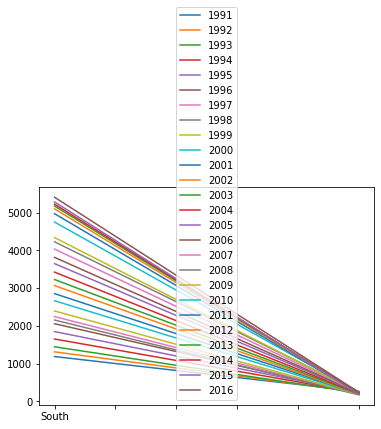

In [ ]:
df_ns = df.iloc[[0, 5], 3:]
df_ns.index = ['South', 'North']
df_ns.columns = df_ns.columns.map(int)
print(df_ns.head())
print('\n')

# 선 그래프 그리기
df_ns.plot()

     South North
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
1995  1847   230




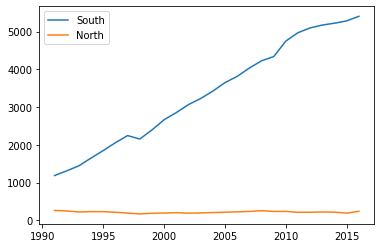

In [ ]:
tdf_ns = df_ns.T
print(tdf_ns.head())
print('\n')

tdf_ns.plot()

     South North
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
1995  1847   230




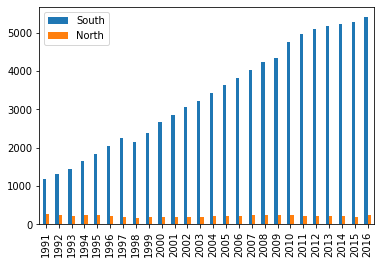

In [ ]:
# 막대 그래프: DataFrame 객체.plot(kind='bar')

import pandas as pd

# df = pd.read_excel('./남북한발전전력량.xlsx')

df_ns = df.iloc[[0, 5], 3:]
df_ns.index = ['South', 'North']
df_ns.columns = df_ns.columns.map(int)

# 행, 열 전치하여 막대 그래프 그리기
tdf_ns = df_ns.T
print(tdf_ns.head())
print('\n')

tdf_ns.plot(kind='bar')

In [ ]:
# 히스토그램: DataFrame 객체.plot(kind='hist')

import pandas as pd

# 위 코드를 참고하여 히스토그램 그래프가 출력되도록 직접 작성해보세요!


#pandas 실습문제 - 아래 문제들을 직접 풀어보세요!

In [ ]:
# 1. 아래 Series 데이터를 하나의 데이터프레임으로 합쳐보세요.
import numpy as np
ser1 = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser2 = pd.Series(np.arange(26))

In [ ]:
# 2. 다음의 데이터프레임을 생성해보세요. 생성된 데이터프레임은 df 변수에 할당합니다.

|  |food|price|rating|
|-:|:---|---:|---:|
|0|KFC|1000|4.5|
|1|McDonald|2000|3.9|
|2|SchoolFood|2500|4.2|


In [ ]:
# 3. 데이터프레임 df를 csv 파일로 저장한 뒤, 다시 읽어오세요.

In [ ]:
# 4. food 칼럼명을 place로 변경해보세요.

In [ ]:
# 5. 칼럼의 순서를 rating, food, price 순으로 바꿔보세요.

In [ ]:
# 6. 데이터프레임 df를 변수 df2에 복사한 뒤, McDonald 행(row)을 삭제해보세요.

In [ ]:
# 7. 데이터프레임 df를 변수 df3에 복사한 뒤, rating, price 2개의 열(column)을 삭제해보세요.

In [ ]:
# 8. SchoolFood의 rating 점수만 출력해보세요.

In [ ]:
# 9. 데이터프레임을 엑셀파일로 저장해보세요.

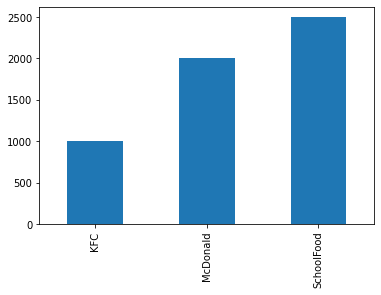

In [ ]:
# 10. 수직막대그래프를 이용하여 각 food별 price를 그래프로 나타내보세요.


In [ ]:
import pandas as pd

df = pd.DataFrame({'food':['KFC', 'McDonald', 'SchoolFood'], 'price':[1000, 2000, 2500], 'rating':[4.5, 3.9, 4.2]})

df_ns = df.iloc[:, 1]
df_ns.index = ['KFC', 'McDonald', 'SchoolFood']

df_ns.plot(kind='bar')